<a href="https://colab.research.google.com/github/Hrithik2212/Neural-Machine-Translation---Engllish2Tamil/blob/main/01_Training_Hrithik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Machine Translation English to Tamil

In [1]:
import numpy as np
import torch
import math
from torch import nn
import torch.nn.functional as F

## Dataset

In [9]:
eng_file = '/content/drive/MyDrive/en-ta/train.en'
tamil_file = '/content/drive/MyDrive/en-ta/train.ta'

In [ ]:
file_path = "/content/drive/MyDrive/en-ta/train.en"  # Replace with the actual path to your file
num_lines_to_read = 10  # Specify the number of lines you want to read

# Open the file in read mode
with open(file_path, "r", encoding="utf-8") as file:
    # Read the specified number of lines
    lines = [file.readline().strip() for _ in range(num_lines_to_read)]

# Print the read lines
for line in lines:
    print(line)


Some 14 months later, the second calf is born.
"Senior advocate Kapil Sibal, who was appearing for Chidambaram, said the condition was not justified for a member of Parliament and ""he would not run away anywhere."""
This photo was taken then.
So far two rounds of the JWG meeting have been held.
The life of the world is nothing but play and diversion, and the abode of the Hereafter is surely better for those who are Godwary. Do you not exercise your reason?
The maximum temperature will be 35 degrees Celsius and the minimum will settle at 27 degree.
I think with all these lives what you're going to find is that your own experience tends to color a good deal which one you pick as closer to the top or closer to the bottom and the idea of a sibling or a child that's no longer involved with the family if your experience with that is very painful, then the chances are that you'll kind of push that one to the bottom.
If they agreed with a point the speaker made, they hummed or grunted their a

In [ ]:
file_path = "/content/drive/MyDrive/en-ta/train.ta"  # Replace with the actual path to your file
num_lines_to_read = 10  # Specify the number of lines you want to read

# Open the file in read mode
with open(file_path, "r", encoding="utf-8") as file:
    # Read the specified number of lines
    lines = [file.readline().strip() for _ in range(num_lines_to_read)]

# Print the read lines
for line in lines:
    print(line)


சுமார் 14 மாதங்கள் கழித்து, இரண்டாம் கன்றை ஈனுகிறது.
‘காா்த்தி சிதம்பரம் எம். பி. யாக உள்ளதால் எங்கும் தப்பிவிட மாட்டாா்’ என்று அவரது சாா்பில் ஆஜரான மூத்த வழக்குரைஞா் கபில் சிபல் வாதாடினாா்.
அதன்போது எடுக்கப்பட்ட புகைப்படம் இது.
இதுவரை இணைப் பணிக் குழு இரண்டுகட்ட பேச்சுவார்த்தை முடிவடைந்துள்ளது.
உலக வாழ்க்கை வீணும் விளையாட்டுமேயன்றி வேறில்லை பயபக்தியுடையவர்களுக்கு நிச்சயமாக மறுமை வீடே மிகவும் மேலானதாகும். நீங்கள் இதைப் புரிந்து கொள்ள வேண்டாமா?
அதிகபட்ச வெப்பநிலை 35 டிகிரி செல்சியஸாகவும் குறைந்தபட்சம் 27 டிகிரி செல்சியஸாகவும் இருக்கும்.
இந்த எல்லா உயிர்களிலும் நீங்கள் கண்டுபிடிக்கப் போவது இதுதான் என்று நான் நினைக்கிறேன் உங்கள் சொந்த அனுபவம் நீங்கள் தேர்ந்தெடுக்கும் ஒரு நல்ல ஒப்பந்தத்தை வண்ணமயமாக்குகிறது மேலே நெருக்கமாக அல்லது கீழே நெருக்கமாக மற்றும் யோசனை ஒரு உடன்பிறப்பு அல்லது இனி சம்பந்தப்படாத குழந்தை உங்கள் அனுபவம் மிகவும் வேதனையாக இருந்தால் குடும்பத்துடன், பின்னர் நீங்கள் அதை கீழே தள்ளும் வாய்ப்புகள் உள்ளன.
பேச்சாளர் சொன்ன ஒரு குறிப்போடு அவர்கள் ஒத்திருந்தால், ‘ உம் ’ எனவும் கனத்த 

In [ ]:
file_path = "/content/drive/MyDrive/en-ta/train.ta"  # Replace with the actual path to your file

# Open the file in read mode
with open(file_path, "r", encoding="utf-8") as file:
    # Use a loop to count the lines
    line_count = sum(1 for line in file)

# Print the number of lines
print(f"The file '{file_path}' contains {line_count} sentences.")


The file '/content/drive/MyDrive/en-ta/train.ta' contains 5264867 sentences.


### The dataset consists of a total of 5.2 million sentencs in english translated to tamil

In [10]:
with open(eng_file, 'r') as file:
    english_sentences = file.readlines()
with open(tamil_file, 'r') as file:
    tamil_sentences = file.readlines()


english_sentences = [sentence.rstrip('\n').lower() for sentence in english_sentences]
tamil_sentences = [sentence.rstrip('\n') for sentence in tamil_sentences]

In [11]:
# Create an empty set to store characters
vocabulary = set()

# Iterate through each text sample and extract characters
for text in tamil_sentences:
    # Convert the text to Unicode code points (characters)
    characters = [char for char in text]
    vocabulary.update(characters)  # Add characters to the vocabulary set

# Convert the set back to a list and sort it
sorted_vocab = sorted(list(vocabulary))

# Print the sorted vocabulary
print(" ".join(sorted_vocab))


  ! " # $ % & ' ( ) * + , - . / 0 1 2 3 4 5 6 7 8 9 : < = > ? @ A B C D E F G H I J K L M N O P Q R S T U V W X Y Z [ \ ] ^ _ ` a b c d e f g h i j k l m n o p q r s t u v w x y z { | } ~   ¡ ¢ £ ¤ ¥ ¦ § ¨ © ª « ¬ ­ ® ¯ ° ± ² ³ ´ µ ¶ · ¸ ¹ º » ¼ ½ ¾ ¿ À Á Â Ã Ä Å Æ Ç È É Ë Ì Í Î Ï Ð Ñ Ò Ó Ô Õ Ö × Ø Ù Ú Û Ü Ý Þ ß à á â ã ä å æ ç è é ê ë ì í î ï ð ñ ò ó ô õ ö ÷ ø ù ú û ü ý þ Ā ā ă ć Č č ď Đ đ Ē ē ĕ ė ě ğ Ġ ġ Ħ ħ Ī ī ĭ İ ı ļ Ł ł ń ň ŋ Ō ō ŏ ő Œ œ Ś ś Ŝ Ş ş Š š Ţ ţ Ŧ ũ ū ŭ Ů ů Ÿ Ż ż ž Ə ƒ ơ ƣ ư ǂ ǃ ǎ ǐ ǒ ǔ ǖ Ǧ ǧ ǫ ǰ Ș Ț ț ȸ ȹ ɐ ɑ ɒ ɓ ɔ ɕ ɘ ə ɛ ɜ ɝ ɟ ɡ ɣ ɤ ɦ ɨ ɪ ɫ ɮ ɯ ɲ ɳ ɴ ɵ ɸ ɽ ɾ ʀ ʁ ʂ ʃ ʈ ʉ ʊ ʋ ʌ ʏ ʒ ʔ ʕ ʤ ʦ ʰ ʱ ʲ ʹ ʻ ʼ ʽ ʾ ʿ ˀ ˆ ˈ ˌ ː ˘ ˚ ˠ ˤ ˮ ̀ ́ ̂ ̃ ̄ ̅ ̆ ̌ ̍ ̟ ̠ ̤ ̥ ̩ ̪ ̯ ̱ ̵ ̶ ̺ ͅ ͍ ͘ ͡ ͭ ΄ Ά · Α Β Γ Δ Ε Θ Ι Κ Λ Μ Ν Ο Π Ρ Σ Τ Υ Φ Χ Ω ά έ ή ί α β γ δ ε ζ η θ ι κ λ μ ν ξ ο π ρ ς σ τ υ φ χ ψ ω ϊ ϋ ό ύ ώ ϕ ϵ І Ј А Б В Г Д Е Ж З И К Л М Н О П Р С Т У Ф Х Ц Ч Ш Ъ Ы Э Ю Я а б в г д е ж з и й к л м н о п р с т у ф х ц ч ш щ ъ ы ь э ю я ё є і ї ј њ ў ѡ ғ Қ қ ҡ ң ү ҷ һ Ӏ Ә ә ӣ ӧ Ө ө Ա Բ Գ Ե 

In [12]:
START_TOKEN = '<START>'
PADDING_TOKEN = '<PAD>'
END_TOKEN = '<END>'

# Got the tamil vocab by from the above output
tamil_vocabulary = [START_TOKEN, ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/',
                      '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', '<', '=', '>', '?', 'ˌ',
                      "ஃ", "அ", "ஆ", "இ", "ஈ", "உ", "ஊ", "எ", "ஏ", "ஐ", "ஒ", "ஓ", "ஔ",
                      "க", "ங", "ச", "ஜ", "ஞ", "ட", "ண",
                      "த", "ந", "ன", "ப", "ம", "ய", "ர",
                      "ற", "ல", "ள", "ழ", "வ", "ஶ", "ஷ", "ஸ", "ஹ",
                      "ா", "ி", "ீ", "ு", "ூ", "ெ", "ே", "ை", "ொ", "ோ", "ௌ", "்", "ௗ",
                      "௦", "௧", "௨", "௫", "௬", "௲", "௳"
                      , PADDING_TOKEN, END_TOKEN]

english_vocabulary = [START_TOKEN, ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/',
                        '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
                        ':', '<', '=', '>', '?', '@',
                        '[', '\\', ']', '^', '_', '`',
                        'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l',
                        'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x',
                        'y', 'z',
                        '{', '|', '}', '~', PADDING_TOKEN, END_TOKEN]

In [13]:
## Mapping
index_to_tamil = {k:v for k,v in enumerate(tamil_vocabulary)}
tamil_to_index = {v:k for k,v in enumerate(tamil_vocabulary)}
index_to_english = {k:v for k,v in enumerate(english_vocabulary)}
english_to_index = {v:k for k,v in enumerate(english_vocabulary)}

In [14]:
import numpy as np
PERCENTILE = 97
print( f"{PERCENTILE}th percentile length Tamil: {np.percentile([len(x) for x in tamil_sentences], PERCENTILE)}" )
print( f"{PERCENTILE}th percentile length English: {np.percentile([len(x) for x in english_sentences], PERCENTILE)}" )


97th percentile length Tamil: 239.0
97th percentile length English: 216.0


In [ ]:

max_sequence_length = 220
min_sequence_length = 3

def is_valid_tokens(sentence , vocab):
    for token in list(set(sentence)):
        if token not in vocab:
            return False
    return True

def is_valid_length(sentence, max_sequence_length , min_sequence_length):
    return len(list(sentence)) < (max_sequence_length - 1) and len(list(sentence)) > min_sequence_length + 1  # need to re-add the eos and bos

valid_sentence_indicies = []
for index in range(len(english_sentences)):
    tamil_sentence, english_sentence = tamil_sentences[index], english_sentences[index]
    if is_valid_length(english_sentence, max_sequence_length , min_sequence_length)  \
      and is_valid_length(english_sentence, max_sequence_length ,min_sequence_length) \
      and is_valid_tokens(tamil_sentence, tamil_vocabulary):
        valid_sentence_indicies.append(index)

print(f"Number of sentences: {len(tamil_sentences)}")
print(f"Number of valid sentences: {len(valid_sentence_indicies)}")

In [ ]:
TOTAL_SENTENCES = 1000000 # lets take 1 million valid sentences to train the model
english_sentences = [english_sentences[i] for i in valid_sentence_indicies[:TOTAL_SENTENCES]]
tamil_sentences = [tamil_sentences[i] for i in valid_sentence_indicies[:TOTAL_SENTENCES]]

In [ ]:
len(english_sentences) , len(tamil_sentences)

In [ ]:
dataset = list(zip(english_sentences , tamil_sentences))

In [ ]:
dataset[222122]

In [ ]:
type(dataset)

## Transformer Model
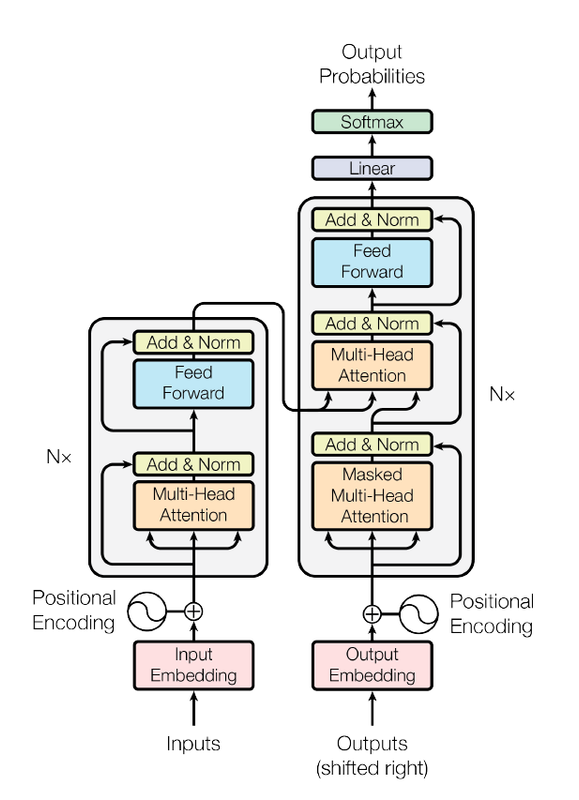

In [ ]:
def get_device():
  return torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')


### Self-Attention

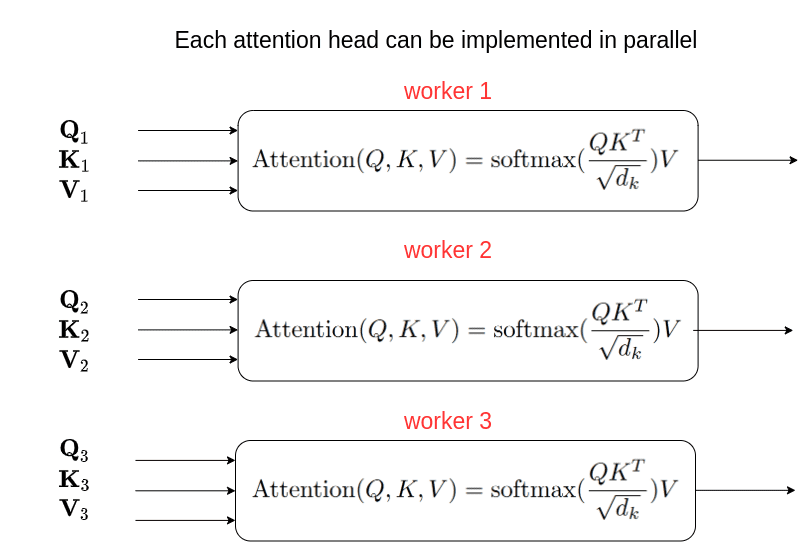



In [ ]:

def Attention(q , k , v  , mask = None ):
  d_k = q.size()[-1]
  scaled = torch.matmul(q , k.transpose(-1,-2)) / math.sqrt(d_k)
  if mask is not None:
    scaled = scaled.permute(1,0,2,3) + mask
    scaled = scaled.permute(1,0,2,3)
  attention = F.softmax(scaled , dim=1)
  values = torch.matmul(attention ,v)
  return values , attention

### Positional Encoding

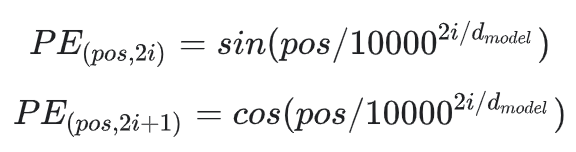

In [ ]:
class PositionalEncoding(nn.Module):
  def __init__(self , d_model ,  max_sequence_length)->None:
    super().__init__()
    self.d_model = d_model
    self.max_sequence_length = max_sequence_length

  def forward(self , x ):
    even_i = torch.arange(0,self.d_model,2).float()
    denominator = torch.pow(10000 , even_i / self.d_model )
    positions = (torch.arange(self.max_sequence_length).reshape(self.max_sequence_length , 1))
    even_pos = torch.sin(positions / denominator )
    odd_pos = torch.cos(positions / denominator )
    positional_encoding = torch.stack([even_pos , odd_pos],dim=2)
    positional_encoding = positional_encoding.flatten(start_dim = 2 ,end_dim=1)
    return positional_encoding


In [ ]:
class SentenceEmbedding(nn.Module):
  def __init__(self , max_sequence_length , d_model , lang_to_index, START_TOKEN , END_TOKEN , PADDING_TOKEN ):
    super().__init__()
    self.vocab_size = len(lang_to_index)
    self.max_sequence_length = max_sequence_length
    self.d_model = d_model
    self.lang_to_index = lang_to_index
    self.embedding = nn.Embedding(self.vocab_size , d_model )
    self.positional_encoder = PositionalEncoding(self._d_model ,self.max_sequence_length)
    self.START_TOKEN = START_TOKEN
    self.END_TOKEN = END_TOKEN
    self.PADDING_TOKEN = PADDING_TOKEN
    self.dropout = nn.Dropout(p=0.1)

  def batch_tokenize(self, batch ,  start_token , end_token ):

    def tokenize(sentence , start_token , end_token ):
      sentence_word_indices = [self.lang_to_index[tok] for tok in list(sentence)]
      if start_token :
        sentence_word_indices.insert(0,self.lang_to_index[self.START_TOKEN])
      if end_token :
        sentence_word_indices.append(self.lang_to_index[self.END_TOKEN])

      for _ in range(len(sentence_word_indices),self.max_sequence_length):
        sentence_word_indices.append(self.lang_to_index[self.PADDING_TOKEN])
      return torch.tensor(sentence_word_indices)

    tokenized = []
    for sentence_num in range(len(batch)):
      tokenized.append(tokenize(batch[sentence_num],start_token ,end_token))
    tokenized = torch.stack(tokenized)
    return tokenized.to(get_device())

  def forward(self , x , start_token , end_token  )->None:
    x = self.batch_tokenize(x , start_token , end_token )
    x = self.embedding(x)
    pos = self.positional_encoder().to(get_device())
    x = self.dropout(x+pos)
    return x



### Multi-Head-Attention
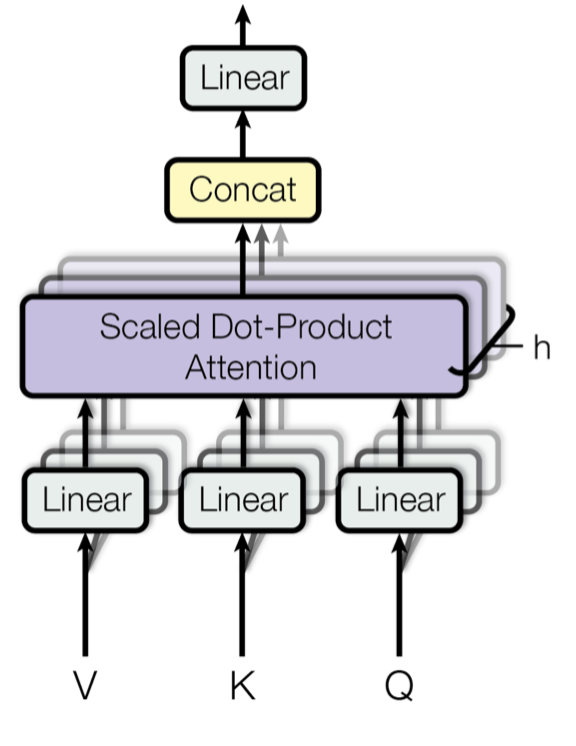

In [ ]:
class MultiHeadAttention(nn.Module):
  def __init__(self , d_model , num_heads ):
    super().__init__()
    self.d_model = d_model
    self.num_heads = num_heads
    self.head_dim = d_model // num_heads
    self.qkv_layer = nn.Linear(d_model , 3*d_model)
    self.Linear_layer = nn.Linear(d_model , d_model )

  def forward(self , x , mask):
    batch_size , sequence_length , d_model = x.size()
    qkv = self.qkv_layer(x)
    qkv = qkv.reshape(batch_size , sequence_length , self.num_heads , 3*self.head_dim)
    qkv = qkv.permute(0,2,1,3)
    q , k , v = qkv.chunks(3,dim=-1)
    values , attention = Attention(q,k,v,mask)
    values = values.permute(0,2,1,3).reshape(batch_size , sequence_length , self.head_nums*self.head_dim)
    out = self.Linear_layer(values)
    return out

In [ ]:
class LayerNormalization(nn.Module):
  def __init__(self , parameters_shape , eps=1e-5):
    super().__init__()
    self.parameters_shape = parameters_shape
    self.eps = eps
    self.gamma = nn.Parameter(torch.ones(parameters_shape))
    self.beta = nn.Parameter(torch.ones(parameters_shape))

  def forward(self , inputs):
    dims = [-(i+1) for i in range(len(self.parameters_shape))]
    mean =inputs.mean(dim=dims,keepdim=True)
    var = ((inputs - mean)**2).mean(dim=dims , keepdim= True)
    std = (var+self.eps).sqrt()
    y = (inputs-mean )/std
    out = self.gamma * y + self.beta
    return out